# Libraries

In [1]:
import sys
import sklearn
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from matplotlib.colors import ListedColormap
from sklearn.model_selection import cross_validate, train_test_split
from sklearn import svm
from sklearn.model_selection import GridSearchCV

# Versions

In [2]:
print("Python version")
print(sys.version)
print("Python Version info.")
print(sys.version_info)
print('sklearn: {}'.format(sklearn.__version__))

Python version
3.9.13 (main, Aug 25 2022, 23:51:50) [MSC v.1916 64 bit (AMD64)]
Python Version info.
sys.version_info(major=3, minor=9, micro=13, releaselevel='final', serial=0)
sklearn: 1.0.2


# Datasets

In [3]:
circle_csv = pd.read_csv("data/circles0.3.csv")
spiral_csv = pd.read_csv("data/spiral1.csv")
moons_csv = pd.read_csv("data/moons1.csv")
halfkernel_csv = pd.read_csv("data/halfkernel.csv")
twogaussians42_csv = pd.read_csv("data/twogaussians42.csv")

X_circle = circle_csv[['x1', 'x2']].values
y_circle = circle_csv['label'].values

X_spiral = spiral_csv[['x', 'y']].values
y_spiral = spiral_csv['label'].values

X_moons = moons_csv[['x1', 'x2']].values
y_moons = moons_csv['label'].values

X_halfkernel = halfkernel_csv[['x1', 'x2']].values
y_halfkernel = halfkernel_csv['label'].values

X_twogaussians42 = twogaussians42_csv[['x1', 'x2']].values
y_twogaussians42 = twogaussians42_csv['label'].values

In [4]:
circle_csv_0 = circle_csv[(circle_csv['label'] == 0)]
circle_csv_1 = circle_csv[(circle_csv['label'] == 1)]
cdf_circle_0 = circle_csv_0[['x1', 'x2']]
cdf_circle_1 = circle_csv_1[['x1', 'x2']]

spiral_csv_0 = spiral_csv[(spiral_csv['label'] == 0)]
spiral_csv_1 = spiral_csv[(spiral_csv['label'] == 1)]
cdf_spiral_0 = spiral_csv_0[['x', 'y']]
cdf_spiral_1 = spiral_csv_1[['x', 'y']]

moons_csv_0 = moons_csv[(moons_csv['label'] == 0)]
moons_csv_1 = moons_csv[(moons_csv['label'] == 1)]
moons_cdf_0 = moons_csv_0[['x1', 'x2']]
moons_cdf_1 = moons_csv_1[['x1', 'x2']]

halfkernel_csv_0 = halfkernel_csv[(halfkernel_csv['label'] == 0)]
halfkernel_csv_1 = halfkernel_csv[(halfkernel_csv['label'] == 1)]
halfkernel_cdf_0 = halfkernel_csv_0[['x1', 'x2']]
halfkernel_cdf_1 = halfkernel_csv_1[['x1', 'x2']]

twogaussians42_csv_0 = twogaussians42_csv[(twogaussians42_csv['label'] == 0)]
twogaussians42_csv_1 = twogaussians42_csv[(twogaussians42_csv['label'] == 1)]
twogaussians42_cdf_0 = twogaussians42_csv_0[['x1', 'x2']]
twogaussians42_cdf_1 = twogaussians42_csv_1[['x1', 'x2']]

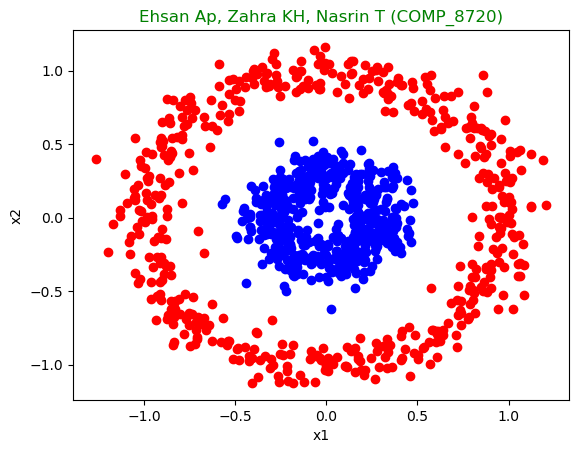

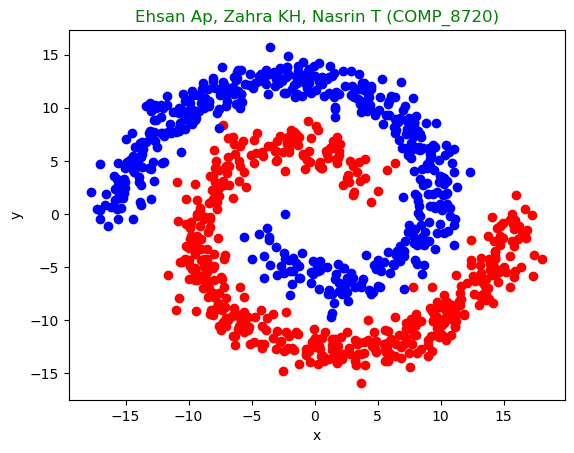

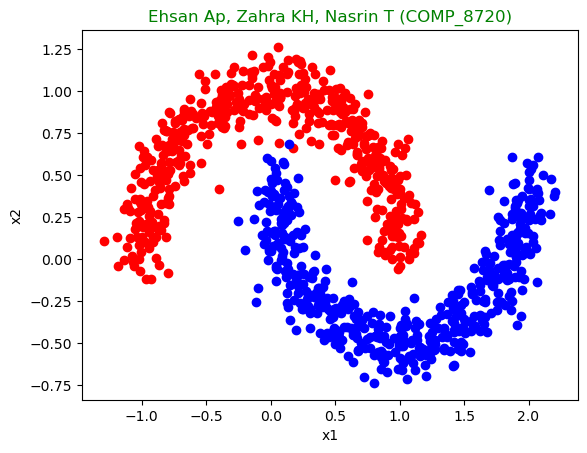

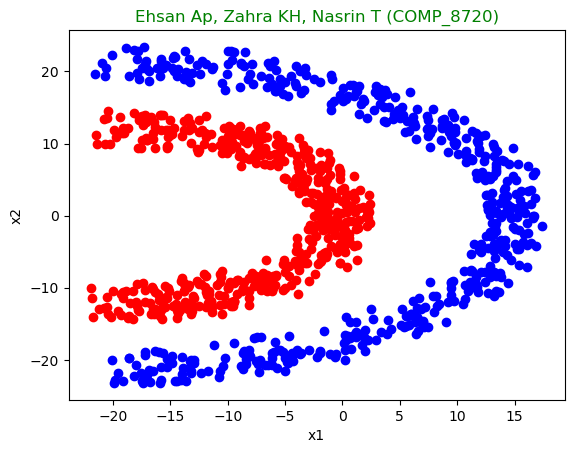

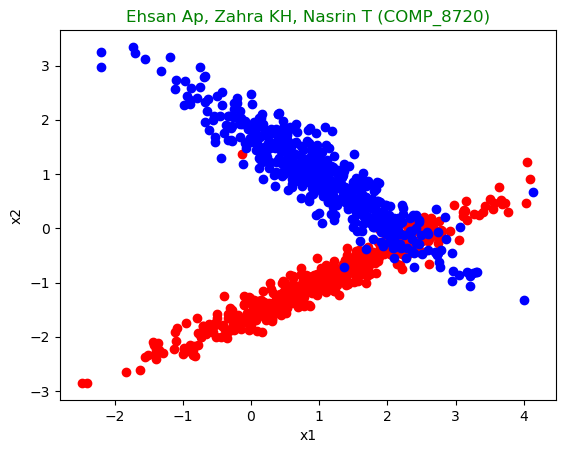

In [5]:
plt.scatter(cdf_circle_0.x1, cdf_circle_0.x2, color='red')
plt.scatter(cdf_circle_1.x1, cdf_circle_1.x2, color='blue')
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)", color='green')
plt.show()

plt.scatter(cdf_spiral_0.x, cdf_spiral_0.y, color='red')
plt.scatter(cdf_spiral_1.x, cdf_spiral_1.y, color='blue')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)", color='green')
plt.show()

plt.scatter(moons_csv_0.x1, moons_csv_0.x2, color='red')
plt.scatter(moons_csv_1.x1, moons_csv_1.x2, color='blue')
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)", color='green')
plt.show()

plt.scatter(halfkernel_csv_0.x1, halfkernel_csv_0.x2, color='red')
plt.scatter(halfkernel_csv_1.x1, halfkernel_csv_1.x2, color='blue')
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)", color='green')
plt.show()

plt.scatter(twogaussians42_csv_0.x1, twogaussians42_csv_0.x2, color='red')
plt.scatter(twogaussians42_csv_1.x1, twogaussians42_csv_1.x2, color='blue')
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)", color='green')
plt.show()

# Generic Method

In [6]:
def confusion_matrix_scorer(clf, X, y):
    y_pred = clf.predict(X)
    cm = confusion_matrix(y, y_pred)
    return {'TN': cm[0, 0], 'FP': cm[0, 1], 'FN': cm[1, 0], 'TP': cm[1, 1]
        , 'PPV': np.divide(cm[1, 1], cm[1, 1] + cm[0, 1], where=cm[1, 1] + cm[0, 1] != 0)
        , 'NPV': np.divide(cm[0, 0], cm[0, 0] + cm[1, 0], where=cm[0, 0] + cm[1, 0] != 0)
        , 'Sensitivity': np.divide(cm[1, 1], cm[1, 1] + cm[1, 0], where=cm[1, 1] + cm[1, 0] != 0)
        , 'Specificity': np.divide(cm[0, 0], cm[0, 0] + cm[0, 1], where=cm[0, 0] + cm[0, 1] != 0)
        , 'Accuracy': np.divide(cm[1, 1] + cm[0, 0], cm[0, 0] + cm[0, 1] + cm[1, 0] + cm[1, 1],
                                where=cm[0, 0] + cm[0, 1] + cm[1, 0] + cm[1, 1] != 0)}

In [7]:
def print_performance_measurement(result):
    print(np.mean(result['test_PPV']))
    print(np.mean(result['test_NPV']))
    print(np.mean(result['test_Sensitivity']))
    print(np.mean(result['test_Specificity']))
    print(np.mean(result['test_Accuracy']))

In [8]:
def draw_two_d(model, X, y):
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    clf = model
    clf.fit(X, y)

    h = .02

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)", color='green')

    plt.show()

In [9]:
def draw_acc_comparison(performance):
    dataSets = ('circles0.3', 'spiral', 'moons', 'halfkernel', 'twogaussians42')
    y_pos = np.arange(len(dataSets))

    fig = plt.figure(figsize = (10, 5))

    plt.bar(dataSets, performance, color ='lightblue',width = 0.4)

    plt.xlabel("Datasets")
    plt.ylabel("Accuracy")
    plt.title("Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)", color='green')
    plt.show()

In [10]:
def draw_svm_r_diff_param(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=0)
    FPR = []
    TPR = []
    AUC = []
    gamma_list = []
    c_list = []

    c_values = [1, 10]
    gamma1 = [0.01, 0.1]

    for cc in range(2):
        for j in range(2):
            svc = svm.SVC(kernel='rbf', random_state=1, gamma=gamma1[j], C=c_values[cc])
            svc.fit(X_train, y_train)
            y_pred_svc = svc.predict(X_test)
            rbf_fpr, rbf_tpr, threshold = roc_curve(y_test, y_pred_svc)
            auc_rbf = auc(rbf_fpr, rbf_tpr)
            AUC.append(auc_rbf)
            FPR.append(rbf_fpr)
            TPR.append(rbf_tpr)
            gamma_list.append(gamma1[j])
            c_list.append(c_values[cc])

    plt.figure(figsize=(5, 5), dpi=100)

    for k in range(4):
        plt.plot(FPR[k], TPR[k], marker='.',
                 label='C=%0.3f' % c_list[k] + ', gamma=%0.3f' % gamma_list[k] + '  (auc=%0.3f)' % AUC[k])

    plt.xlabel('False Positive Rate (Specificity)')
    plt.ylabel('True Positive Rate (Recall)')
    plt.title("Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)", color='green')
    plt.legend()
    plt.show()

In [11]:
def grid_search(X,y):
    param_grid = {'C': [0.1, 1, 10],
                  'gamma': [10, 1, 0.1, 0.01],
                  'kernel': ['rbf']}
    grid = GridSearchCV(svm.SVC(), param_grid, refit=True, verbose=3, cv=10)
    grid.fit(X,y)
    print(grid.best_params_)
    print(grid.best_estimator_)
    print(grid.best_score_)

# a. LDA (linear discriminant analysis)

In [12]:
linear_model = LinearDiscriminantAnalysis()

In [13]:
cv_results_circle = cross_validate(linear_model, X_circle, y_circle, cv=10, scoring=confusion_matrix_scorer)
acc_circle = np.mean(cv_results_circle['test_Accuracy'])
print_performance_measurement(cv_results_circle)

0.460788506118705
0.45872276617409324
0.492
0.42800000000000005
0.4600000000000001


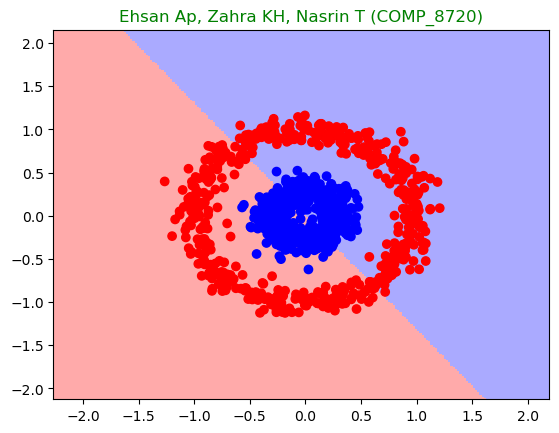

In [14]:
draw_two_d(linear_model, X_circle, y_circle)

In [15]:
cv_results_spiral = cross_validate(linear_model, X_spiral, y_spiral, cv=10, scoring=confusion_matrix_scorer)
acc_spiral = np.mean(cv_results_spiral['test_Accuracy'])
print_performance_measurement(cv_results_spiral)

0.7509154277040085
0.747500992952495
0.744
0.75
0.7470000000000001


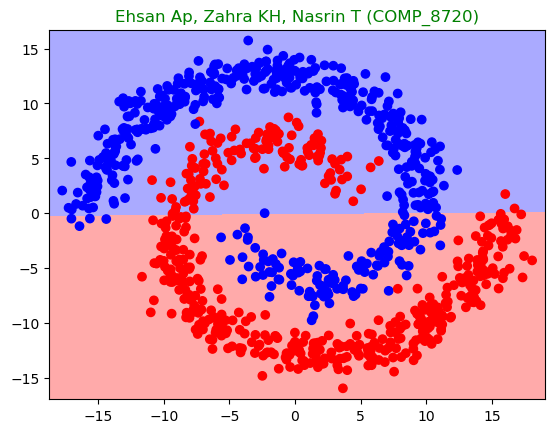

In [16]:
draw_two_d(linear_model, X_spiral, y_spiral)

In [17]:
cv_results_moons = cross_validate(linear_model, X_moons, y_moons, cv=10, scoring=confusion_matrix_scorer)
acc_moons = np.mean(cv_results_moons['test_Accuracy'])
print_performance_measurement(cv_results_moons)

0.885687941024746
0.8819805328781467
0.8799999999999999
0.8859999999999999
0.883


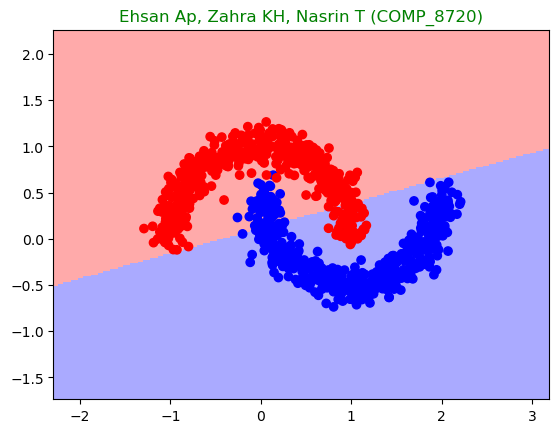

In [18]:
draw_two_d(linear_model, X_moons, y_moons)

In [19]:
cv_results_halfkernel = cross_validate(linear_model, X_halfkernel, y_halfkernel, cv=10, scoring=confusion_matrix_scorer)
acc_halfkernel = np.mean(cv_results_halfkernel['test_Accuracy'])
print_performance_measurement(cv_results_halfkernel)

0.6844611250514365
0.6612348553433639
0.6439999999999999
0.696
0.67


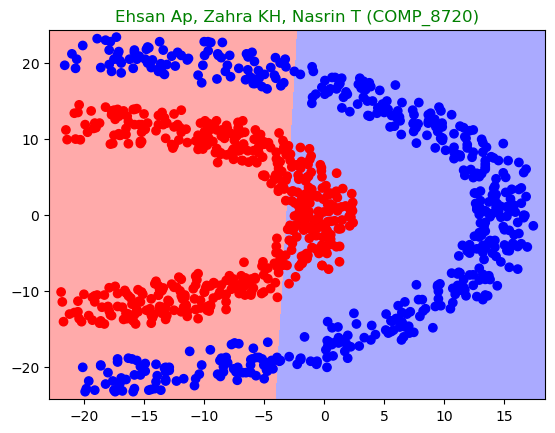

In [20]:
draw_two_d(linear_model, X_halfkernel, y_halfkernel)

In [21]:
cv_results_twogaussians42 = cross_validate(linear_model, X_twogaussians42, y_twogaussians42, cv=10,
                                           scoring=confusion_matrix_scorer)
acc_twogaussians42 = np.mean(cv_results_twogaussians42['test_Accuracy'])
print_performance_measurement(cv_results_twogaussians42)

0.9273553366290873
0.8812098346485536
0.8737959183673469
0.9301176470588235
0.9019999999999999


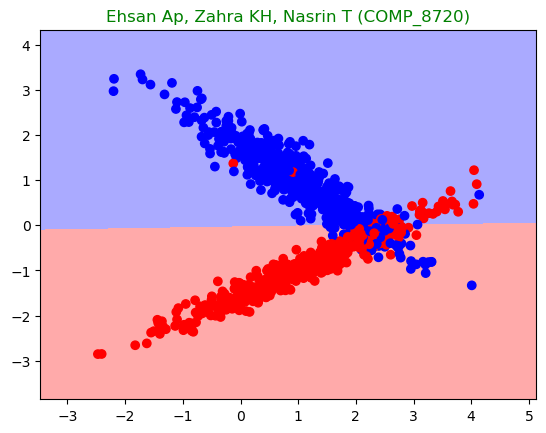

In [22]:
draw_two_d(linear_model, X_twogaussians42, y_twogaussians42)

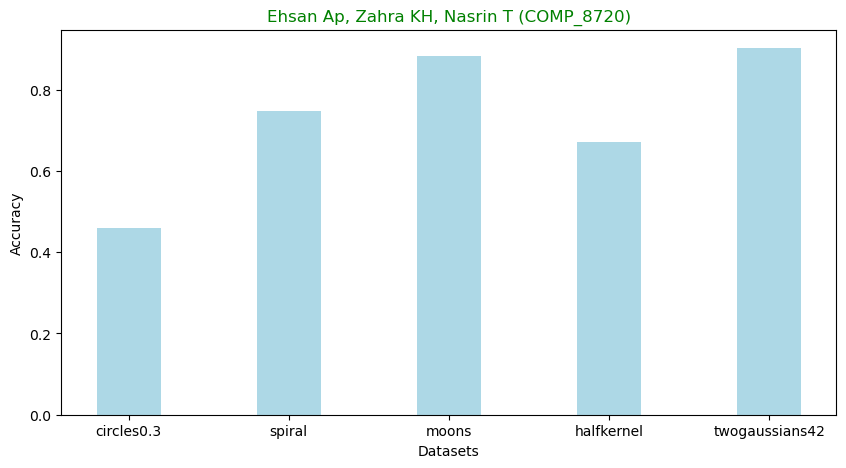

In [23]:
draw_acc_comparison((acc_circle,acc_spiral,acc_moons,acc_halfkernel,acc_twogaussians42))

# b. Quadratic (quadratic discriminant analysis)

In [24]:
quadratic = QuadraticDiscriminantAnalysis()

In [25]:
cv_results_circle = cross_validate(quadratic, X_circle, y_circle, cv=10, scoring=confusion_matrix_scorer)
acc_circle = np.mean(cv_results_circle['test_Accuracy'])
print_performance_measurement(cv_results_circle)

1.0
0.9813271449231493
0.9799999999999999
1.0
0.99


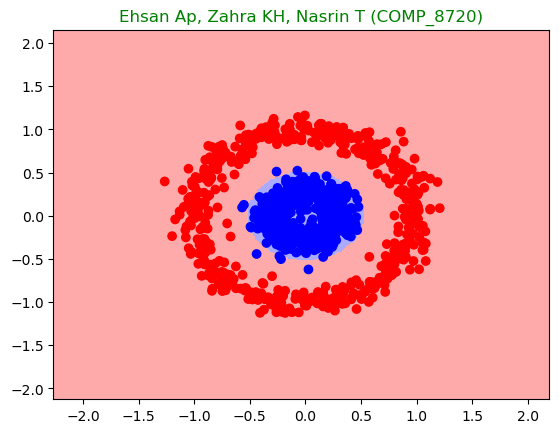

In [26]:
draw_two_d(quadratic, X_circle, y_circle)

In [27]:
cv_results_spiral = cross_validate(quadratic, X_spiral, y_spiral, cv=10, scoring=confusion_matrix_scorer)
acc_spiral = np.mean(cv_results_spiral['test_Accuracy'])
print_performance_measurement(cv_results_spiral)

0.749783403699644
0.748231044424891
0.746
0.748
0.7470000000000001


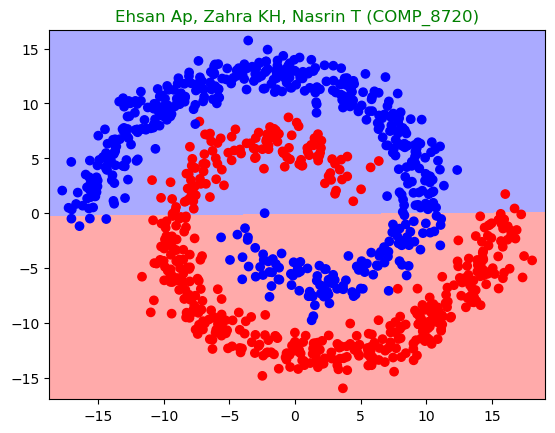

In [28]:
draw_two_d(quadratic, X_spiral, y_spiral)

In [29]:
cv_results_moons = cross_validate(quadratic, X_moons, y_moons, cv=10, scoring=confusion_matrix_scorer)
acc_moons = np.mean(cv_results_moons['test_Accuracy'])
print_performance_measurement(cv_results_moons)

0.8857797108347135
0.8801725540106105
0.8779999999999999
0.8860000000000001
0.882


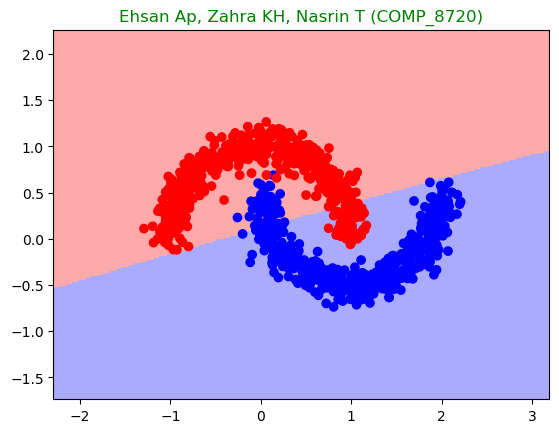

In [30]:
draw_two_d(quadratic, X_moons, y_moons)

In [31]:
cv_results_halfkernel = cross_validate(quadratic, X_moons, y_moons, cv=10, scoring=confusion_matrix_scorer)
acc_halfkernel = np.mean(cv_results_halfkernel['test_Accuracy'])
print_performance_measurement(cv_results_moons)

0.8857797108347135
0.8801725540106105
0.8779999999999999
0.8860000000000001
0.882


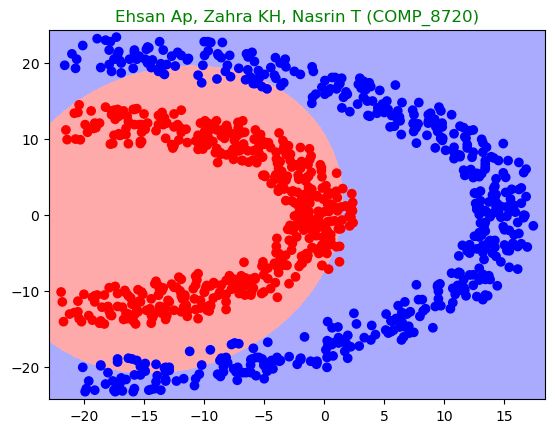

In [32]:
draw_two_d(quadratic, X_halfkernel, y_halfkernel)

In [33]:
cv_results_twogaussians42 = cross_validate(quadratic, X_twogaussians42, y_twogaussians42, cv=10,
                                           scoring=confusion_matrix_scorer)
acc_twogaussians42 = np.mean(cv_results_twogaussians42['test_Accuracy'])
print_performance_measurement(cv_results_twogaussians42)

0.9770206493945095
0.9272280962814851
0.9217142857142857
0.978
0.95


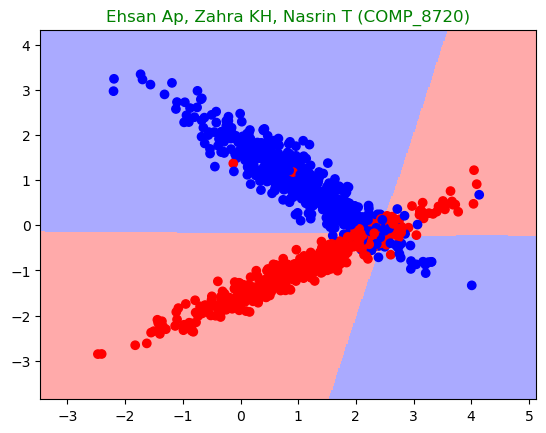

In [34]:
draw_two_d(quadratic, X_twogaussians42, y_twogaussians42)

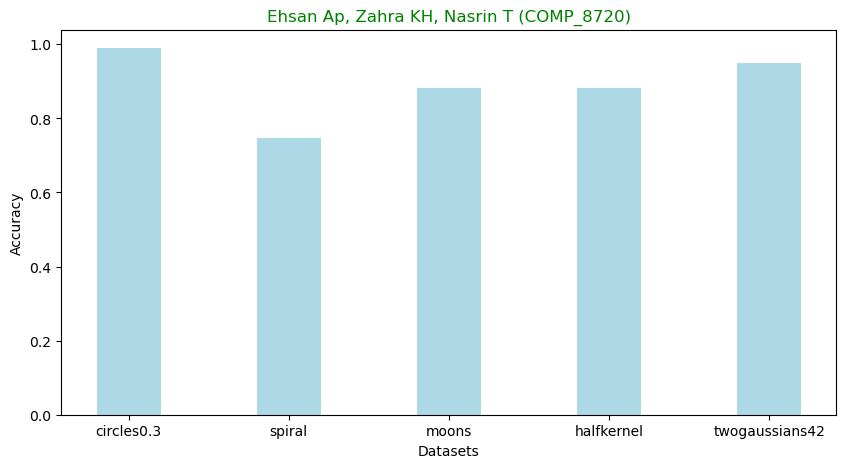

In [35]:
draw_acc_comparison((acc_circle,acc_spiral,acc_moons,acc_halfkernel,acc_twogaussians42))

# c. Naïve Bayes

In [36]:
naive_type = GaussianNB()

In [37]:
cv_results_circle = cross_validate(naive_type, X_circle, y_circle, cv=10, scoring=confusion_matrix_scorer)
acc_circle = np.mean(cv_results_circle['test_Accuracy'])
print_performance_measurement(cv_results_circle)

1.0
0.9813271449231493
0.9799999999999999
1.0
0.99


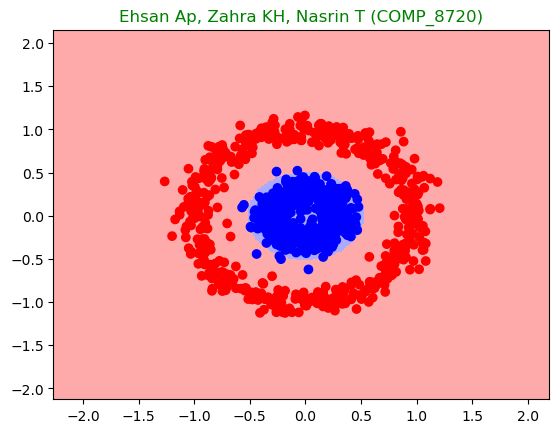

In [38]:
draw_two_d(naive_type, X_circle, y_circle)

In [39]:
cv_results_spiral = cross_validate(naive_type, X_spiral, y_spiral, cv=10, scoring=confusion_matrix_scorer)
acc_spiral = np.mean(cv_results_spiral['test_Accuracy'])
print_performance_measurement(cv_results_spiral)

0.7349519873725038
0.7346683350723482
0.732
0.734
0.733


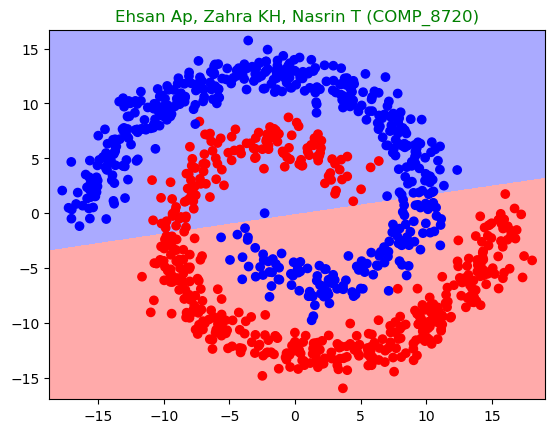

In [40]:
draw_two_d(naive_type, X_spiral, y_spiral)

In [112]:
cv_results_moons = cross_validate(naive_type, X_moons, y_moons, cv=10, scoring=confusion_matrix_scorer)
acc_moons = np.mean(cv_results_moons['test_Accuracy'])
print_performance_measurement(cv_results_moons)

0.8858259643037238
0.881884643458549
0.8799999999999999
0.8860000000000001
0.883


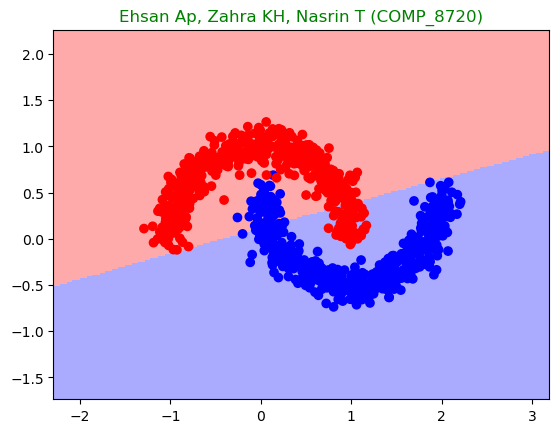

In [113]:
draw_two_d(naive_type, X_moons, y_moons)

In [41]:
cv_results_halfkernel = cross_validate(naive_type, X_halfkernel, y_halfkernel, cv=10,scoring=confusion_matrix_scorer)
acc_halfkernel=np.mean(cv_results_halfkernel['test_Accuracy'])
print_performance_measurement(cv_results_halfkernel)

0.960576722178233
0.9276536297004032
0.924
0.9620000000000001
0.943


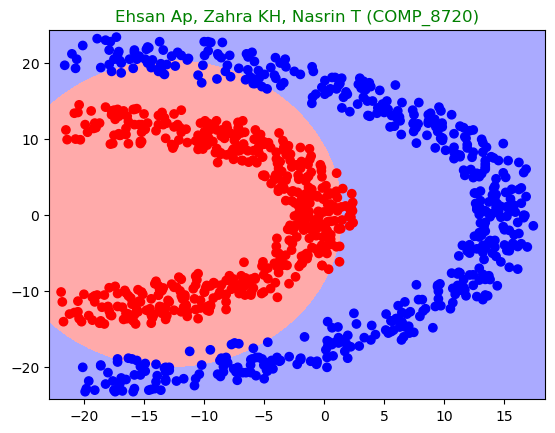

In [42]:
draw_two_d(naive_type,X_halfkernel,y_halfkernel)

In [43]:
cv_results_twogaussians42 = cross_validate(naive_type, X_twogaussians42, y_twogaussians42, cv=10,scoring=confusion_matrix_scorer)
acc_twogaussians42=np.mean(cv_results_twogaussians42['test_Accuracy'])
print_performance_measurement(cv_results_twogaussians42)

0.9240144556126492
0.8872312721543736
0.8817959183673469
0.9260784313725491
0.9039999999999999


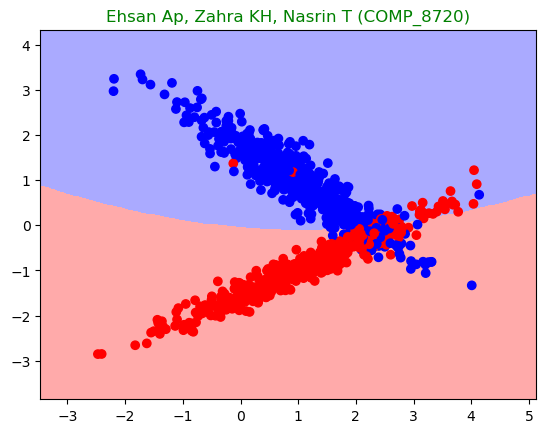

In [44]:
draw_two_d(naive_type,X_twogaussians42,y_twogaussians42)

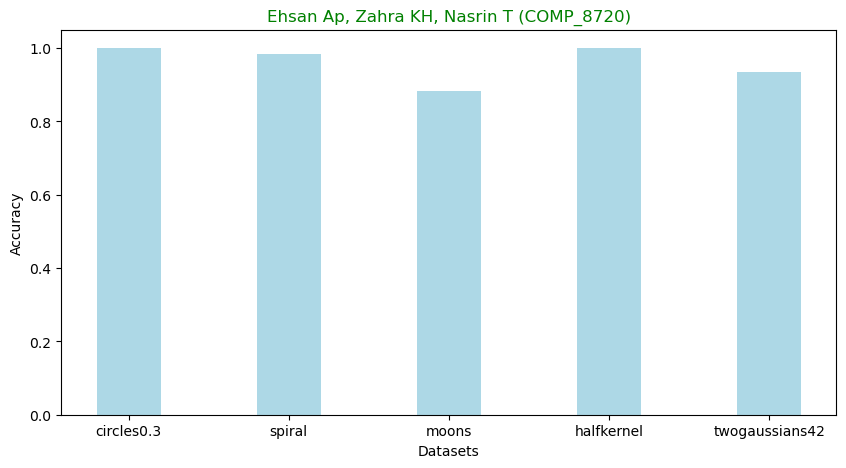

In [114]:
draw_acc_comparison((acc_circle,acc_spiral,acc_moons,acc_halfkernel,acc_twogaussians42))

# SVM-L

In [46]:
linear = svm.SVC(kernel="linear")

In [47]:
cv_results_circle = cross_validate(linear, X_circle, y_circle, cv=10, scoring=confusion_matrix_scorer)
acc_circle = np.mean(cv_results_circle['test_Accuracy'])
print_performance_measurement(cv_results_circle)

0.5779537695361799
0.8149951583504216
0.922
0.32599999999999996
0.624


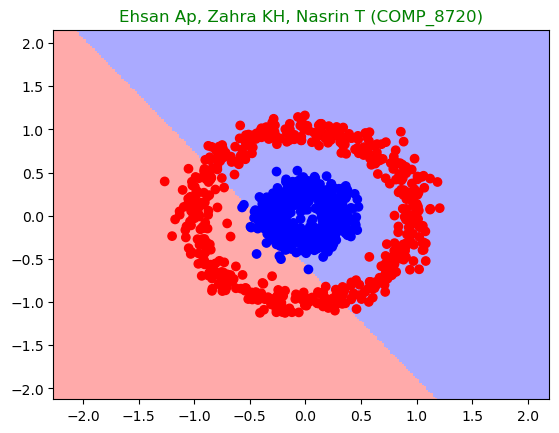

In [48]:
draw_two_d(linear,X_circle,y_circle)

In [49]:
cv_results_spiral = cross_validate(linear, X_spiral, y_spiral, cv=10, scoring=confusion_matrix_scorer)
acc_spiral = np.mean(cv_results_spiral['test_Accuracy'])
print_performance_measurement(cv_results_spiral)

0.7438542619316885
0.7433012794419908
0.74
0.742
0.7409999999999999


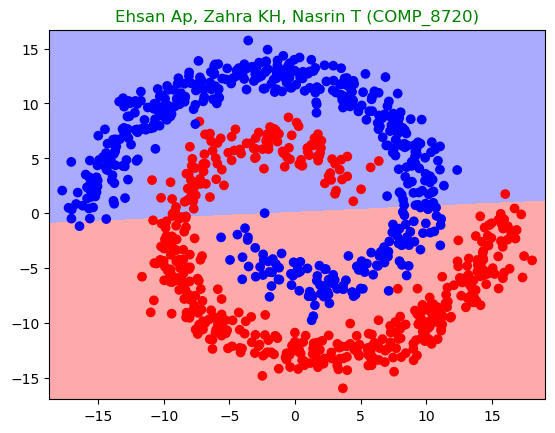

In [50]:
draw_two_d(linear,X_spiral,y_spiral)

In [51]:
cv_results_moons = cross_validate(linear, X_moons, y_moons, cv=10,scoring=confusion_matrix_scorer)
acc_moons = np.mean(cv_results_moons['test_Accuracy'])
print_performance_measurement(cv_results_moons)

0.8865572453749639
0.8771469521308985
0.874
0.8879999999999999
0.881


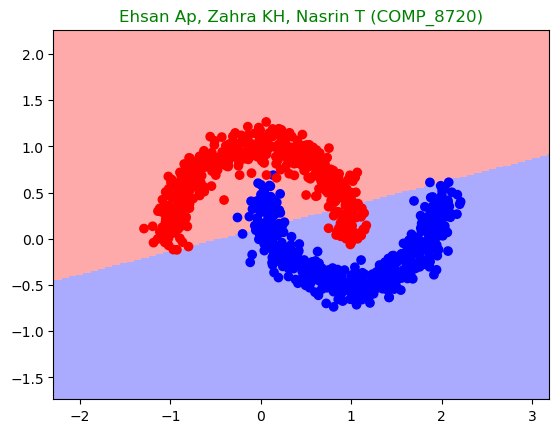

In [52]:
draw_two_d(linear,X_moons,y_moons)

In [53]:
cv_results_halfkernel = cross_validate(linear, X_halfkernel, y_halfkernel, cv=10,
                                       scoring=confusion_matrix_scorer)
acc_halfkernel = np.mean(cv_results_halfkernel['test_Accuracy'])
print_performance_measurement(cv_results_halfkernel)

0.8258543939311511
0.6846579642640743
0.5980000000000001
0.868
0.7329999999999999


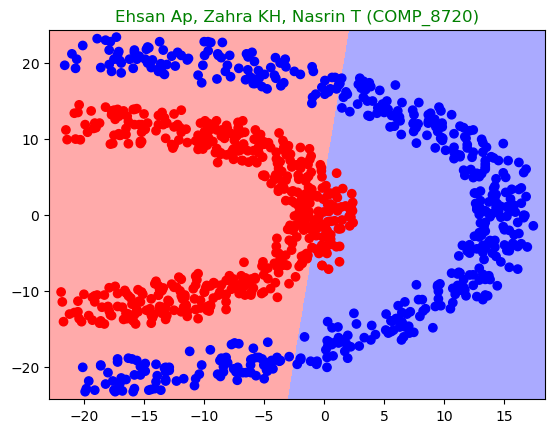

In [54]:
draw_two_d(linear,X_halfkernel,y_halfkernel)

In [55]:
cv_results_twogaussians42 = cross_validate(linear, X_twogaussians42, y_twogaussians42, cv=10,scoring=confusion_matrix_scorer)
acc_twogaussians42 = np.mean(cv_results_twogaussians42['test_Accuracy'])
print_performance_measurement(cv_results_twogaussians42)

0.9795270939407505
0.8792244832851962
0.8637142857142857
0.9820392156862745
0.923


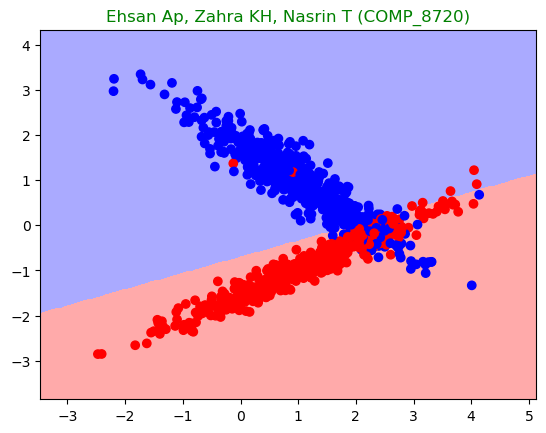

In [56]:
draw_two_d(linear,X_twogaussians42,y_twogaussians42)

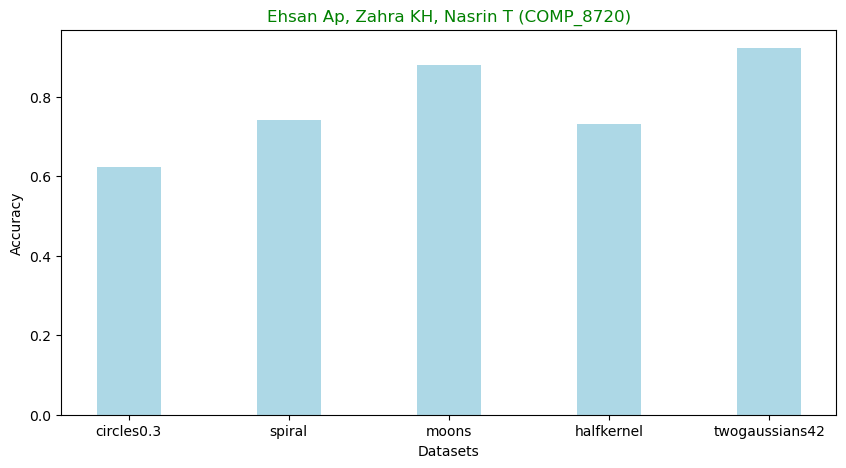

In [57]:
draw_acc_comparison((acc_circle,acc_spiral,acc_moons,acc_halfkernel,acc_twogaussians42))

# SVM-P

In [58]:
poly = svm.SVC(kernel="poly", degree=2)

In [59]:
cv_results_circle = cross_validate(poly, X_circle, y_circle, cv=10, scoring=confusion_matrix_scorer)
acc_circle = np.mean(cv_results_circle['test_Accuracy'])
print_performance_measurement(cv_results_circle)

1.0
1.0
1.0
1.0
1.0


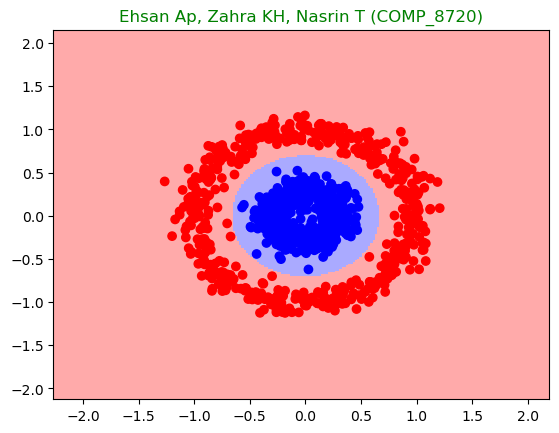

In [60]:
draw_two_d(poly,X_circle,y_circle)

In [61]:
cv_results_spiral = cross_validate(poly, X_spiral, y_spiral, cv=10, scoring=confusion_matrix_scorer)
acc_spiral = np.mean(cv_results_spiral['test_Accuracy'])
print_performance_measurement(cv_results_spiral)

0.46448257768082984
0.46038181302492776
0.5619999999999999
0.376
0.46900000000000003


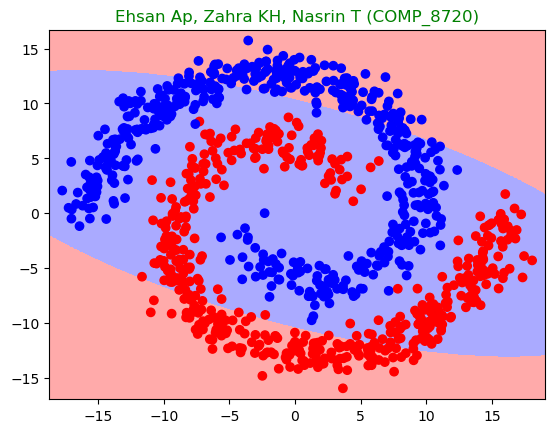

In [62]:
draw_two_d(poly,X_spiral,y_spiral)

In [63]:
cv_results_moons = cross_validate(poly, X_moons, y_moons, cv=10,
                                        scoring=confusion_matrix_scorer)
acc_moonsSpiral = np.mean(cv_results_moons['test_Accuracy'])
print_performance_measurement(cv_results_moons)

0.7292765949663448
0.9435145573380869
0.9620000000000001
0.6400000000000001
0.8009999999999999


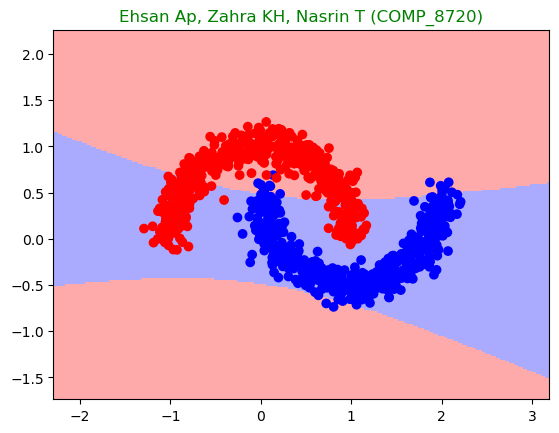

In [64]:
draw_two_d(poly,X_moons,y_moons)

In [65]:
cv_results_halfkernel = cross_validate(poly, X_halfkernel, y_halfkernel, cv=10,scoring=confusion_matrix_scorer)
acc_halfkernel = np.mean(cv_results_halfkernel['test_Accuracy'])
print_performance_measurement(cv_results_halfkernel)

1.0
0.7075890841092393
0.584
1.0
0.792


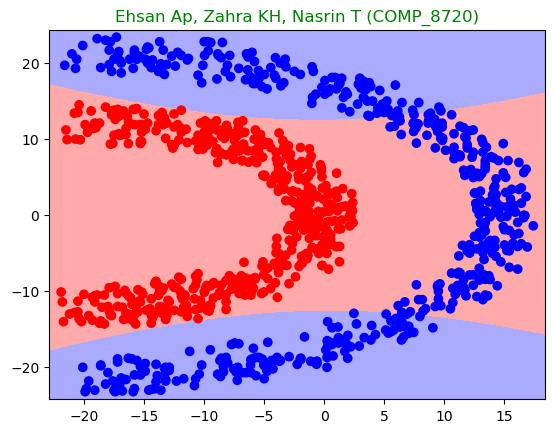

In [66]:
draw_two_d(poly,X_halfkernel,y_halfkernel)

In [67]:
cv_results_twogaussians42 = cross_validate(poly, X_twogaussians42, y_twogaussians42, cv=10,                                         scoring=confusion_matrix_scorer)
acc_twogaussians42 = np.mean(cv_results_twogaussians42['test_Accuracy'])
print_performance_measurement(cv_results_twogaussians42)

0.762522527523033
0.7215221333247649
0.6993061224489796
0.7785490196078431
0.7390000000000001


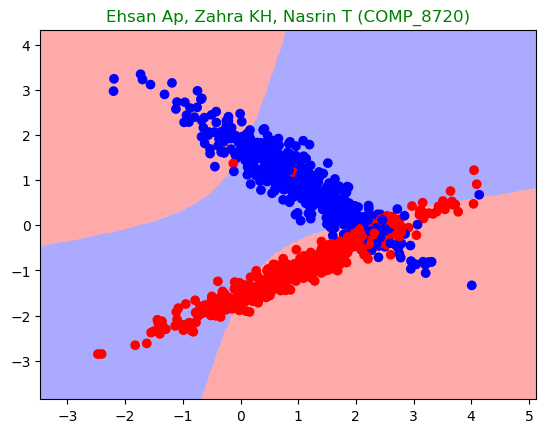

In [68]:
draw_two_d(poly,X_twogaussians42,y_twogaussians42)

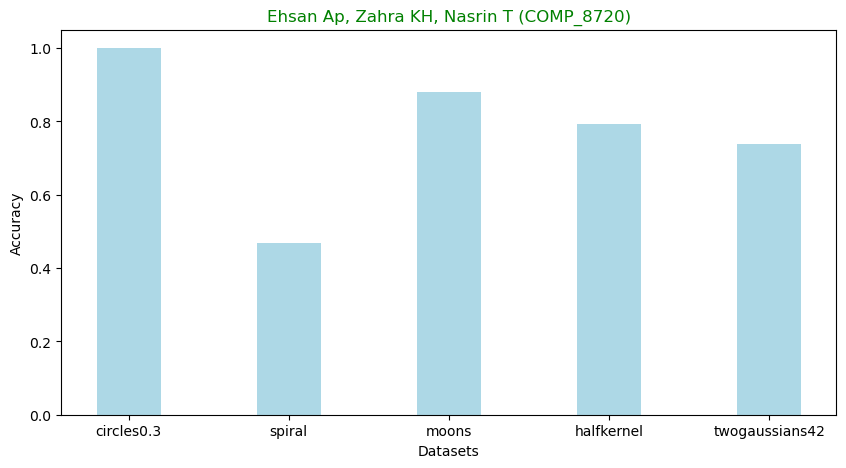

In [69]:
draw_acc_comparison((acc_circle,acc_spiral,acc_moons,acc_halfkernel,acc_twogaussians42))

# SVM-R

In [70]:
svm_r=svm.SVC(kernel="rbf")

In [71]:
cv_results_circle = cross_validate(svm_r, X_circle, y_circle, cv=10, scoring=confusion_matrix_scorer)
acc_circle = np.mean(cv_results_circle['test_Accuracy'])
print_performance_measurement(cv_results_circle)

1.0
1.0
1.0
1.0
1.0


In [72]:
grid_search(X_circle,y_circle)

Fitting 10 folds for each of 12 candidates, totalling 120 fits
[CV 1/10] END ......C=0.1, gamma=10, kernel=rbf;, score=1.000 total time=   0.0s
[CV 2/10] END ......C=0.1, gamma=10, kernel=rbf;, score=1.000 total time=   0.0s
[CV 3/10] END ......C=0.1, gamma=10, kernel=rbf;, score=1.000 total time=   0.0s
[CV 4/10] END ......C=0.1, gamma=10, kernel=rbf;, score=1.000 total time=   0.0s
[CV 5/10] END ......C=0.1, gamma=10, kernel=rbf;, score=1.000 total time=   0.0s
[CV 6/10] END ......C=0.1, gamma=10, kernel=rbf;, score=1.000 total time=   0.0s
[CV 7/10] END ......C=0.1, gamma=10, kernel=rbf;, score=1.000 total time=   0.0s
[CV 8/10] END ......C=0.1, gamma=10, kernel=rbf;, score=1.000 total time=   0.0s
[CV 9/10] END ......C=0.1, gamma=10, kernel=rbf;, score=1.000 total time=   0.0s
[CV 10/10] END .....C=0.1, gamma=10, kernel=rbf;, score=0.980 total time=   0.0s
[CV 1/10] END .......C=0.1, gamma=1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 2/10] END .......C=0.1, gamma=1, kernel=rb

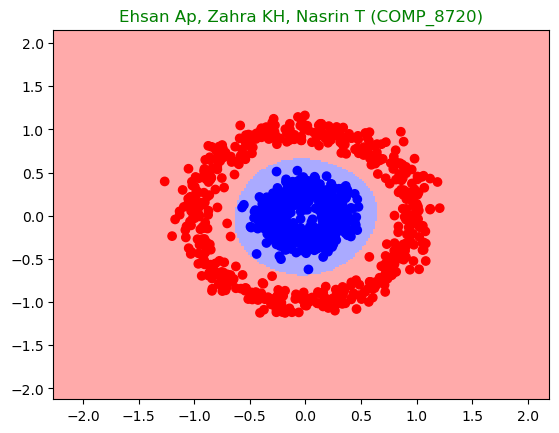

In [73]:
draw_two_d(svm_r,X_circle,y_circle)

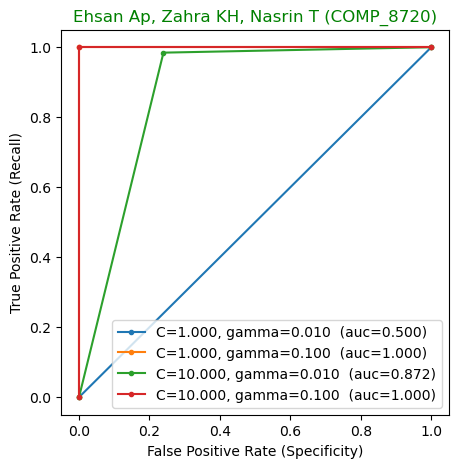

In [74]:
draw_svm_r_diff_param(X_circle,y_circle)

In [75]:
cv_results_spiral = cross_validate(svm_r, X_spiral, y_spiral, cv=10, scoring=confusion_matrix_scorer)
acc_spiral = np.mean(cv_results_spiral['test_Accuracy'])
print_performance_measurement(cv_results_spiral)

0.9863107088989442
0.9843364213609972
0.984
0.986
0.9850000000000001


In [76]:
grid_search(X_spiral,y_spiral)

Fitting 10 folds for each of 12 candidates, totalling 120 fits
[CV 1/10] END ......C=0.1, gamma=10, kernel=rbf;, score=0.950 total time=   0.0s
[CV 2/10] END ......C=0.1, gamma=10, kernel=rbf;, score=0.850 total time=   0.0s
[CV 3/10] END ......C=0.1, gamma=10, kernel=rbf;, score=0.790 total time=   0.0s
[CV 4/10] END ......C=0.1, gamma=10, kernel=rbf;, score=0.790 total time=   0.0s
[CV 5/10] END ......C=0.1, gamma=10, kernel=rbf;, score=0.920 total time=   0.0s
[CV 6/10] END ......C=0.1, gamma=10, kernel=rbf;, score=0.860 total time=   0.0s
[CV 7/10] END ......C=0.1, gamma=10, kernel=rbf;, score=0.750 total time=   0.0s
[CV 8/10] END ......C=0.1, gamma=10, kernel=rbf;, score=0.690 total time=   0.0s
[CV 9/10] END ......C=0.1, gamma=10, kernel=rbf;, score=0.760 total time=   0.0s
[CV 10/10] END .....C=0.1, gamma=10, kernel=rbf;, score=0.950 total time=   0.0s
[CV 1/10] END .......C=0.1, gamma=1, kernel=rbf;, score=0.980 total time=   0.0s
[CV 2/10] END .......C=0.1, gamma=1, kernel=rb

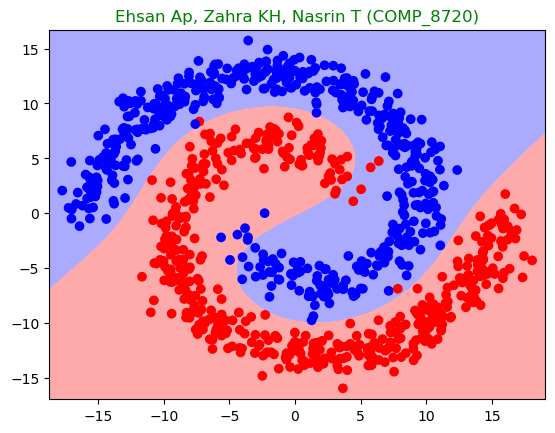

In [77]:
draw_two_d(svm_r,X_spiral,y_spiral)

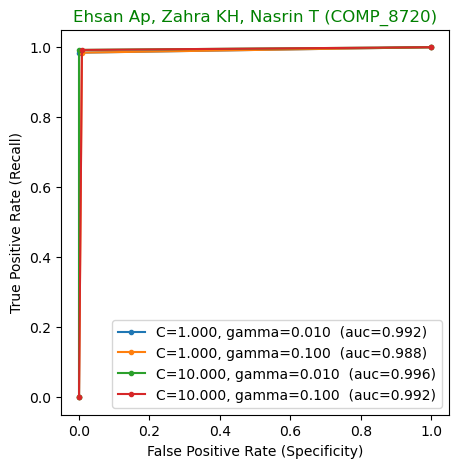

In [78]:
draw_svm_r_diff_param(X_spiral,y_spiral)

In [79]:
cv_results_moons = cross_validate(svm_r, X_moons, y_moons, cv=10,
                                        scoring=confusion_matrix_scorer)
acc_moons = np.mean(cv_results_moons['test_Accuracy'])
print_performance_measurement(cv_results_moons)

0.9980392156862745
0.9980392156862745
0.998
0.998
0.998


In [80]:
grid_search(X_moons,y_moons)

Fitting 10 folds for each of 12 candidates, totalling 120 fits
[CV 1/10] END ......C=0.1, gamma=10, kernel=rbf;, score=1.000 total time=   0.0s
[CV 2/10] END ......C=0.1, gamma=10, kernel=rbf;, score=0.990 total time=   0.0s
[CV 3/10] END ......C=0.1, gamma=10, kernel=rbf;, score=1.000 total time=   0.0s
[CV 4/10] END ......C=0.1, gamma=10, kernel=rbf;, score=1.000 total time=   0.0s
[CV 5/10] END ......C=0.1, gamma=10, kernel=rbf;, score=1.000 total time=   0.0s
[CV 6/10] END ......C=0.1, gamma=10, kernel=rbf;, score=1.000 total time=   0.0s
[CV 7/10] END ......C=0.1, gamma=10, kernel=rbf;, score=1.000 total time=   0.0s
[CV 8/10] END ......C=0.1, gamma=10, kernel=rbf;, score=1.000 total time=   0.0s
[CV 9/10] END ......C=0.1, gamma=10, kernel=rbf;, score=1.000 total time=   0.0s
[CV 10/10] END .....C=0.1, gamma=10, kernel=rbf;, score=1.000 total time=   0.0s
[CV 1/10] END .......C=0.1, gamma=1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 2/10] END .......C=0.1, gamma=1, kernel=rb

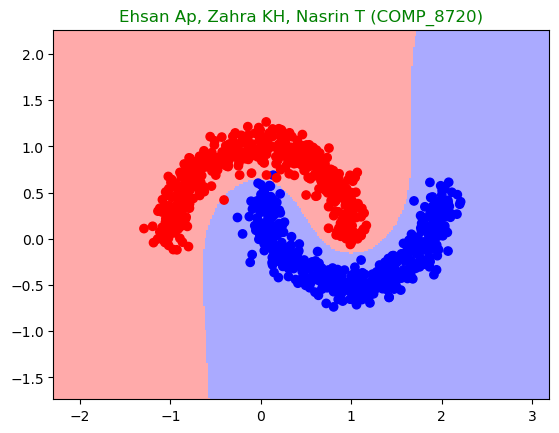

In [81]:
draw_two_d(svm_r,X_moons,y_moons)

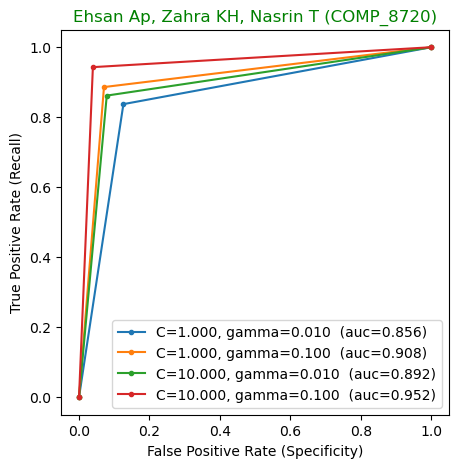

In [82]:
draw_svm_r_diff_param(X_moons,y_moons)

In [83]:
cv_results_halfkernel = cross_validate(svm_r, X_halfkernel, y_halfkernel, cv=10,
                                       scoring=confusion_matrix_scorer)
acc_halfkernel = np.mean(cv_results_halfkernel['test_Accuracy'])
print_performance_measurement(cv_results_halfkernel)

1.0
1.0
1.0
1.0
1.0


In [84]:
grid_search(X_halfkernel,y_halfkernel)

Fitting 10 folds for each of 12 candidates, totalling 120 fits
[CV 1/10] END ......C=0.1, gamma=10, kernel=rbf;, score=0.730 total time=   0.0s
[CV 2/10] END ......C=0.1, gamma=10, kernel=rbf;, score=0.720 total time=   0.0s
[CV 3/10] END ......C=0.1, gamma=10, kernel=rbf;, score=0.900 total time=   0.0s
[CV 4/10] END ......C=0.1, gamma=10, kernel=rbf;, score=0.760 total time=   0.0s
[CV 5/10] END ......C=0.1, gamma=10, kernel=rbf;, score=0.720 total time=   0.0s
[CV 6/10] END ......C=0.1, gamma=10, kernel=rbf;, score=0.860 total time=   0.0s
[CV 7/10] END ......C=0.1, gamma=10, kernel=rbf;, score=0.820 total time=   0.0s
[CV 8/10] END ......C=0.1, gamma=10, kernel=rbf;, score=0.760 total time=   0.0s
[CV 9/10] END ......C=0.1, gamma=10, kernel=rbf;, score=0.780 total time=   0.0s
[CV 10/10] END .....C=0.1, gamma=10, kernel=rbf;, score=0.940 total time=   0.0s
[CV 1/10] END .......C=0.1, gamma=1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 2/10] END .......C=0.1, gamma=1, kernel=rb

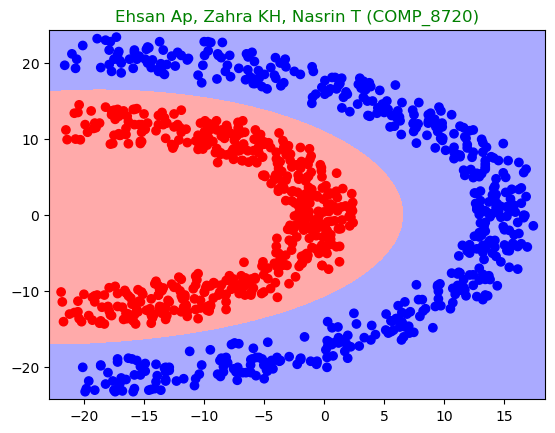

In [85]:
draw_two_d(svm_r,X_halfkernel,y_halfkernel)

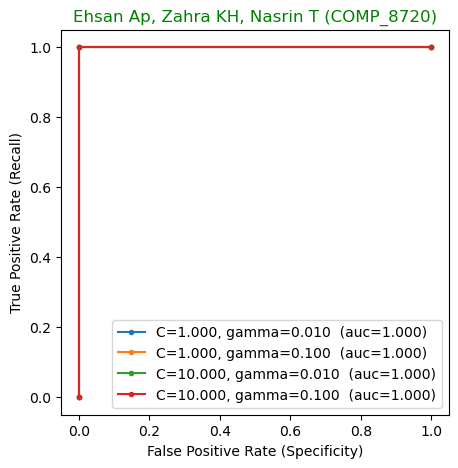

In [86]:
draw_svm_r_diff_param(X_halfkernel,y_halfkernel)

In [87]:
cv_results_twogaussians42 = cross_validate(svm_r, X_twogaussians42, y_twogaussians42, cv=10,                                     scoring=confusion_matrix_scorer)
acc_twogaussians42 = np.mean(cv_results_twogaussians42['test_Accuracy'])
print_performance_measurement(cv_results_twogaussians42)

0.9932277782884457
0.889781416175261
0.875673469387755
0.994
0.9349999999999999


In [88]:
grid_search(X_twogaussians42,y_twogaussians42)

Fitting 10 folds for each of 12 candidates, totalling 120 fits
[CV 1/10] END ......C=0.1, gamma=10, kernel=rbf;, score=0.930 total time=   0.0s
[CV 2/10] END ......C=0.1, gamma=10, kernel=rbf;, score=0.950 total time=   0.0s
[CV 3/10] END ......C=0.1, gamma=10, kernel=rbf;, score=0.880 total time=   0.0s
[CV 4/10] END ......C=0.1, gamma=10, kernel=rbf;, score=0.980 total time=   0.0s
[CV 5/10] END ......C=0.1, gamma=10, kernel=rbf;, score=0.970 total time=   0.0s
[CV 6/10] END ......C=0.1, gamma=10, kernel=rbf;, score=0.960 total time=   0.0s
[CV 7/10] END ......C=0.1, gamma=10, kernel=rbf;, score=0.970 total time=   0.0s
[CV 8/10] END ......C=0.1, gamma=10, kernel=rbf;, score=0.930 total time=   0.0s
[CV 9/10] END ......C=0.1, gamma=10, kernel=rbf;, score=0.950 total time=   0.0s
[CV 10/10] END .....C=0.1, gamma=10, kernel=rbf;, score=0.930 total time=   0.0s
[CV 1/10] END .......C=0.1, gamma=1, kernel=rbf;, score=0.930 total time=   0.0s
[CV 2/10] END .......C=0.1, gamma=1, kernel=rb

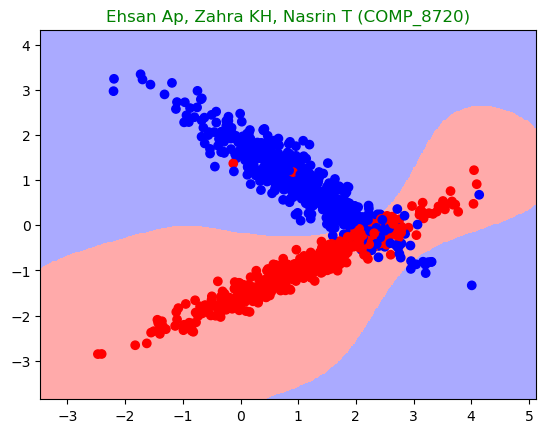

In [89]:
draw_two_d(svm_r,X_twogaussians42,y_twogaussians42)

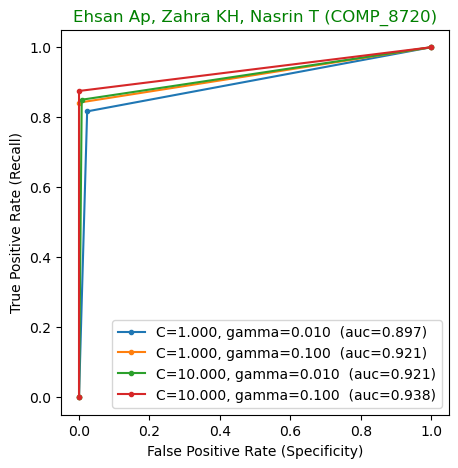

In [90]:
draw_svm_r_diff_param(X_twogaussians42,y_twogaussians42)

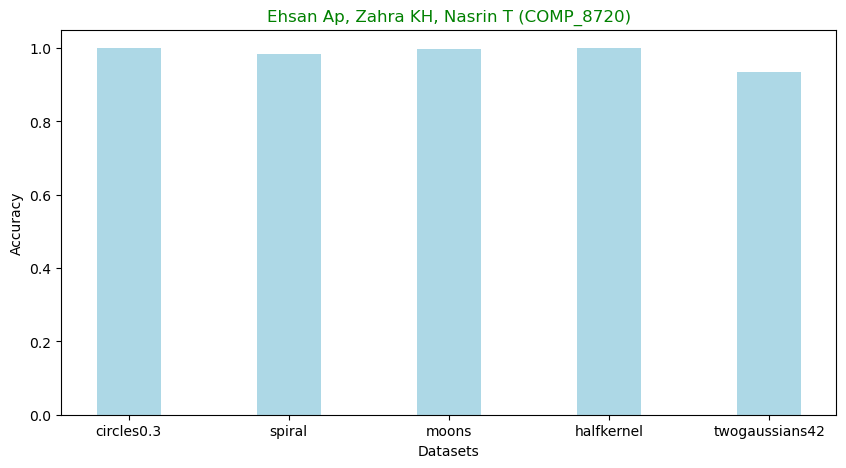

In [91]:
draw_acc_comparison((acc_circle,acc_spiral,acc_moons,acc_halfkernel,acc_twogaussians42))

In [92]:
dataSets = ('circles0.3', 'spiral1', 'moons1', 'halfkernel', 'twogaussians42')
x_circle = X_circle[:, 0]
y_circle_1 = X_circle[:, 1]
deltaX = (max(x_circle) - min(x_circle)) / 10
deltaY = (max(y_circle_1) - min(y_circle_1)) / 10
xmin = min(x_circle) - deltaX
xmax = max(x_circle) + deltaX
ymin = min(y_circle_1) - deltaY
ymax = max(y_circle_1) + deltaY
print(xmin, xmax, ymin, ymax)
xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]

-1.5128400891459903 1.4548991434467091 -1.3535797501070925 1.3908558018722033


In [93]:
positions = np.vstack([xx.ravel(), yy.ravel()])
values = np.vstack([x_circle, y_circle_1])
kernel = st.gaussian_kde(values)
f = np.reshape(kernel(positions).T, xx.shape)

Text(0.5, 1.0, 'Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)')

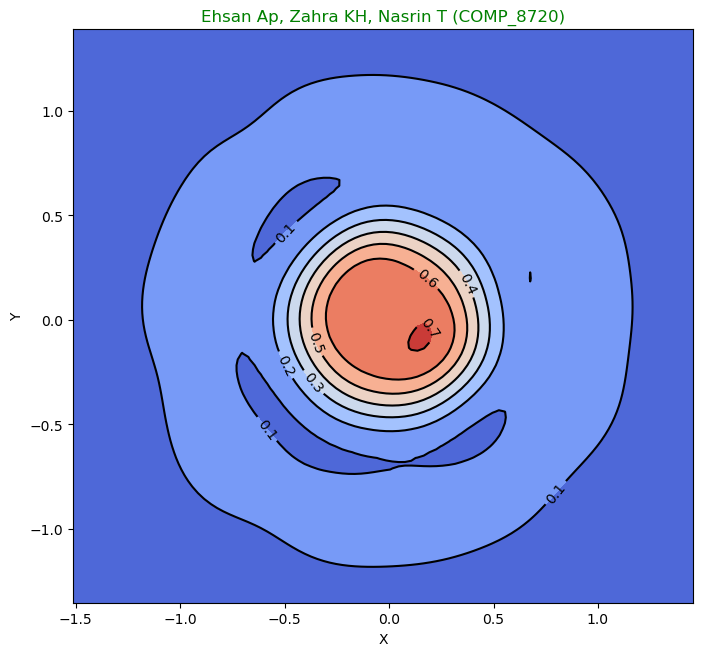

In [94]:
fig = plt.figure(figsize=(8, 8))
ax = fig.gca()
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
cfset = ax.contourf(xx, yy, f, cmap='coolwarm')
ax.imshow(np.rot90(f), cmap='coolwarm', extent=[xmin, xmax, ymin, ymax])
cset = ax.contour(xx, yy, f, colors='k')
ax.clabel(cset, inline=1, fontsize=10)
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.title("Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)", color='green')

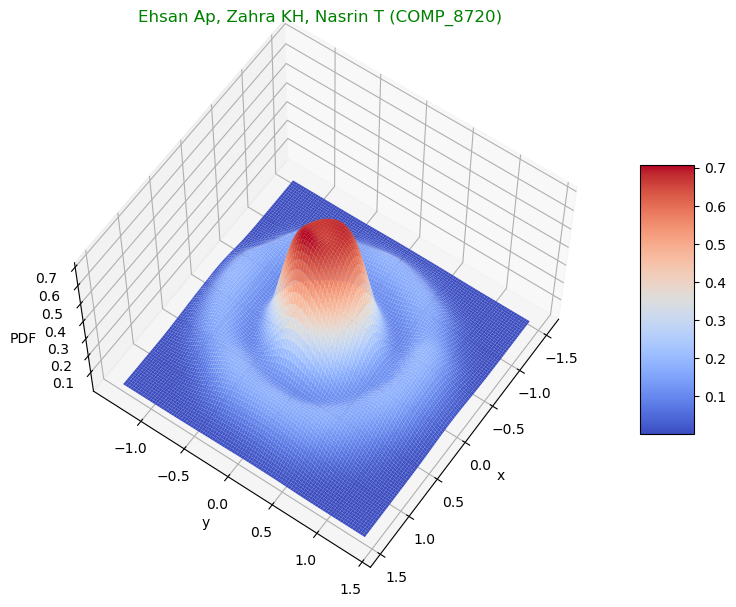

In [95]:
fig = plt.figure(figsize=(13, 7))
ax = plt.axes(projection='3d')
surf = ax.plot_surface(xx, yy, f, rstride=1, cstride=1, cmap='coolwarm', edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('PDF')
ax.set_title("Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)", color='green')
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.view_init(60, 35)

In [96]:
x_spiral = X_spiral[:, 0]
y_spiral_1 = X_spiral[:, 1]
deltaX = (max(x_spiral) - min(x_spiral)) / 10
deltaY = (max(y_spiral_1) - min(y_spiral_1)) / 10
xmin = min(x_spiral) - deltaX
xmax = max(x_spiral) + deltaX
ymin = min(y_spiral_1) - deltaY
ymax = max(y_spiral_1) + deltaY
print(xmin, xmax, ymin, ymax)
xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]

-21.31336 21.63692 -19.106708 18.901948


In [97]:
positions = np.vstack([xx.ravel(), yy.ravel()])
values = np.vstack([x_spiral, y_spiral_1])
kernel = st.gaussian_kde(values)
f = np.reshape(kernel(positions).T, xx.shape)

Text(0.5, 1.0, 'Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)')

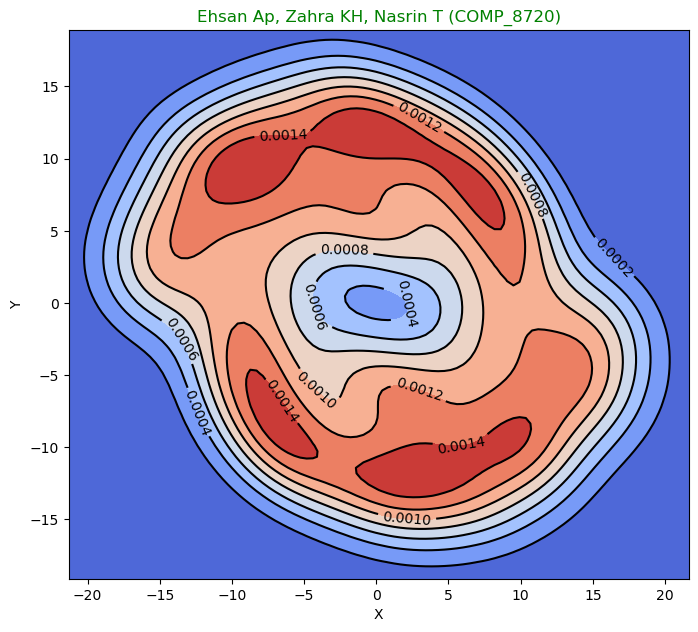

In [98]:
fig = plt.figure(figsize=(8, 8))
ax = fig.gca()
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
cfset = ax.contourf(xx, yy, f, cmap='coolwarm')
ax.imshow(np.rot90(f), cmap='coolwarm', extent=[xmin, xmax, ymin, ymax])
cset = ax.contour(xx, yy, f, colors='k')
ax.clabel(cset, inline=1, fontsize=10)
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.title("Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)", color='green')

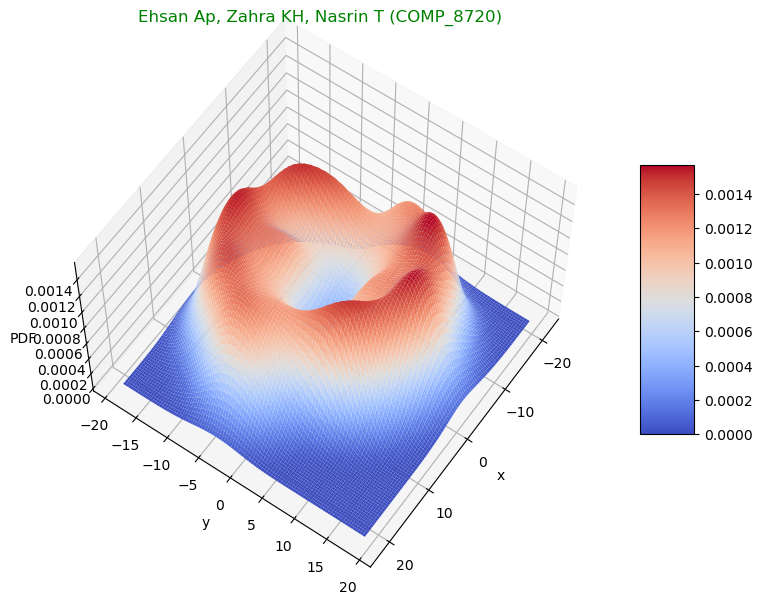

In [99]:
fig = plt.figure(figsize=(13, 7))
ax = plt.axes(projection='3d')
surf = ax.plot_surface(xx, yy, f, rstride=1, cstride=1, cmap='coolwarm', edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('PDF')
ax.set_title("Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)", color='green')
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.view_init(60, 35)

In [100]:
x_moonsSpiral = X_moons[:, 0]
y_moonsSpiral_1 = X_moons[:, 1]
deltaX = (max(x_moonsSpiral) - min(x_moonsSpiral)) / 10
deltaY = (max(y_moonsSpiral_1) - min(y_moonsSpiral_1)) / 10
xmin = min(x_moonsSpiral) - deltaX
xmax = max(x_moonsSpiral) + deltaX
ymin = min(y_moonsSpiral_1) - deltaY
ymax = max(y_moonsSpiral_1) + deltaY
print(xmin, xmax, ymin, ymax)
xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]

-1.64016618618866 2.5578892829005113 -0.9365362499347265 1.4652629501953407


In [101]:
positions = np.vstack([xx.ravel(), yy.ravel()])
values = np.vstack([x_moonsSpiral, y_moonsSpiral_1])
kernel = st.gaussian_kde(values)
f = np.reshape(kernel(positions).T, xx.shape)

Text(0.5, 1.0, 'Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)')

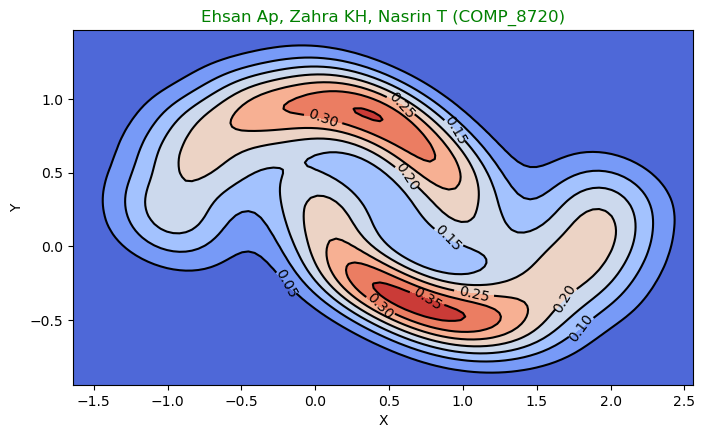

In [102]:
fig = plt.figure(figsize=(8, 8))
ax = fig.gca()
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
cfset = ax.contourf(xx, yy, f, cmap='coolwarm')
ax.imshow(np.rot90(f), cmap='coolwarm', extent=[xmin, xmax, ymin, ymax])
cset = ax.contour(xx, yy, f, colors='k')
ax.clabel(cset, inline=1, fontsize=10)
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.title("Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)", color='green')

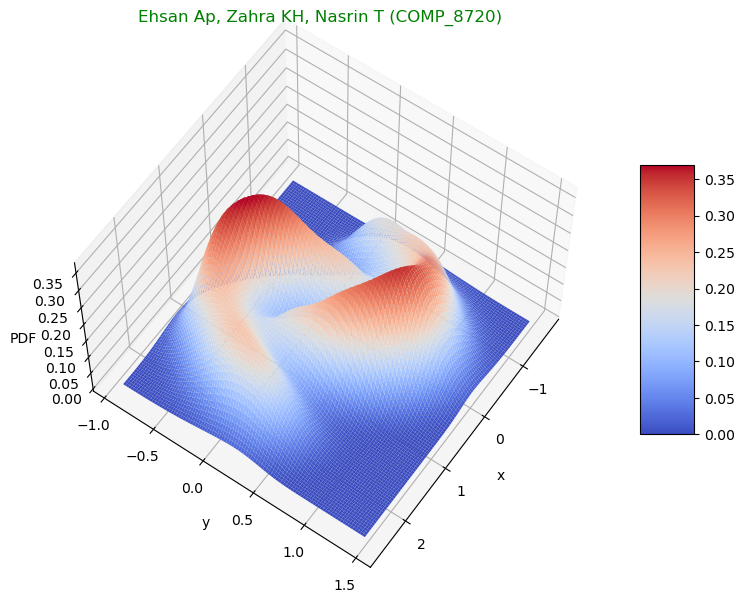

In [103]:
fig = plt.figure(figsize=(13, 7))
ax = plt.axes(projection='3d')
surf = ax.plot_surface(xx, yy, f, rstride=1, cstride=1, cmap='coolwarm', edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('PDF')
ax.set_title("Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)", color='green')
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.view_init(60, 35)

In [104]:
x_halfkernel = X_halfkernel[:, 0]
y_halfkernel_1 = X_halfkernel[:, 1]
deltaX = (max(x_halfkernel) - min(x_halfkernel)) / 10
deltaY = (max(y_halfkernel_1) - min(y_halfkernel_1)) / 10
xmin = min(x_halfkernel) - deltaX
xmax = max(x_halfkernel) + deltaX
ymin = min(y_halfkernel_1) - deltaY
ymax = max(y_halfkernel_1) + deltaY
print(xmin, xmax, ymin, ymax)
xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]

-25.83 21.33 -27.86 28.06


In [105]:
positions = np.vstack([xx.ravel(), yy.ravel()])
values = np.vstack([x_halfkernel, y_halfkernel_1])
kernel = st.gaussian_kde(values)
f = np.reshape(kernel(positions).T, xx.shape)

Text(0.5, 1.0, 'Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)')

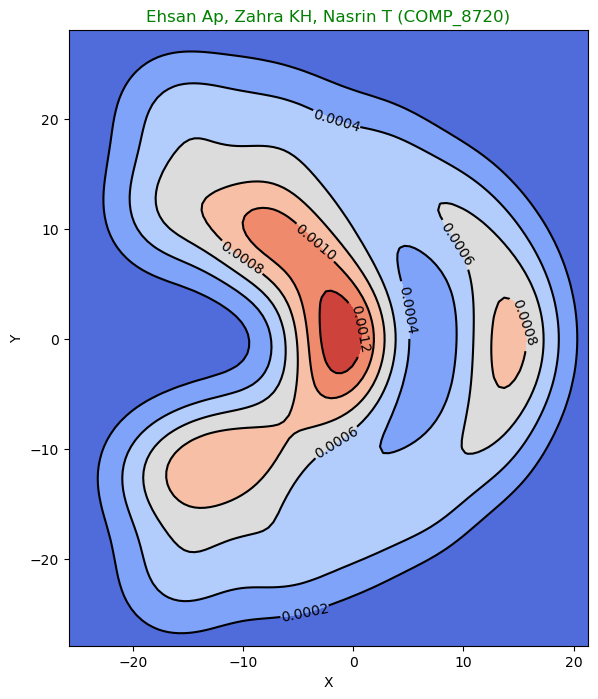

In [106]:
fig = plt.figure(figsize=(8, 8))
ax = fig.gca()
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
cfset = ax.contourf(xx, yy, f, cmap='coolwarm')
ax.imshow(np.rot90(f), cmap='coolwarm', extent=[xmin, xmax, ymin, ymax])
cset = ax.contour(xx, yy, f, colors='k')
ax.clabel(cset, inline=1, fontsize=10)
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.title("Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)", color='green')

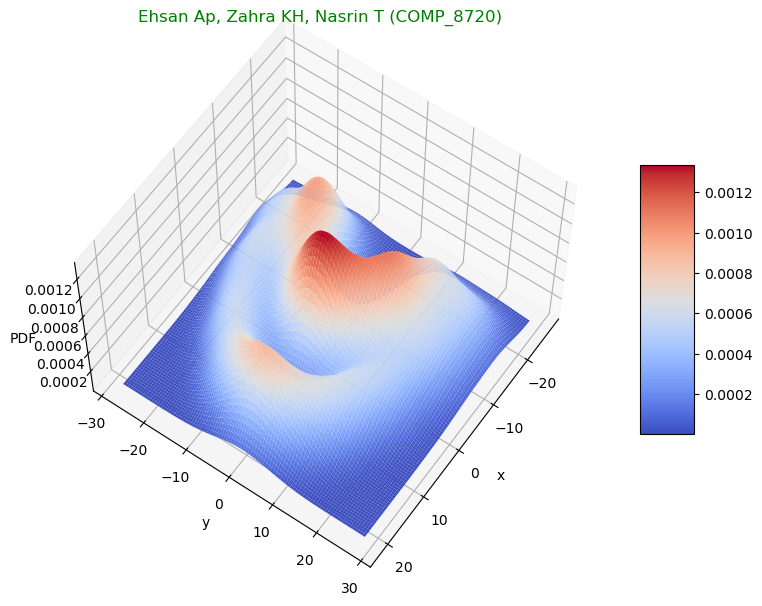

In [107]:
fig = plt.figure(figsize=(13, 7))
ax = plt.axes(projection='3d')
surf = ax.plot_surface(xx, yy, f, rstride=1, cstride=1, cmap='coolwarm', edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('PDF')
ax.set_title("Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)", color='green')
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.view_init(60, 35)

In [108]:
x_twogaussians42 = X_twogaussians42[:, 0]
y_twogaussians42_1 = X_twogaussians42[:, 1]
deltaX = (max(x_twogaussians42) - min(x_twogaussians42)) / 10
deltaY = (max(y_twogaussians42_1) - min(y_twogaussians42_1)) / 10
xmin = min(x_twogaussians42) - deltaX
xmax = max(x_twogaussians42) + deltaX
ymin = min(y_twogaussians42_1) - deltaY
ymax = max(y_twogaussians42_1) + deltaY
print(xmin, xmax, ymin, ymax)
xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]

-3.133861012539503 4.7998587113297635 -3.470355001806178 3.9622476214495714


In [109]:
positions = np.vstack([xx.ravel(), yy.ravel()])
values = np.vstack([x_twogaussians42, y_twogaussians42_1])
kernel = st.gaussian_kde(values)
f = np.reshape(kernel(positions).T, xx.shape)

Text(0.5, 1.0, 'Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)')

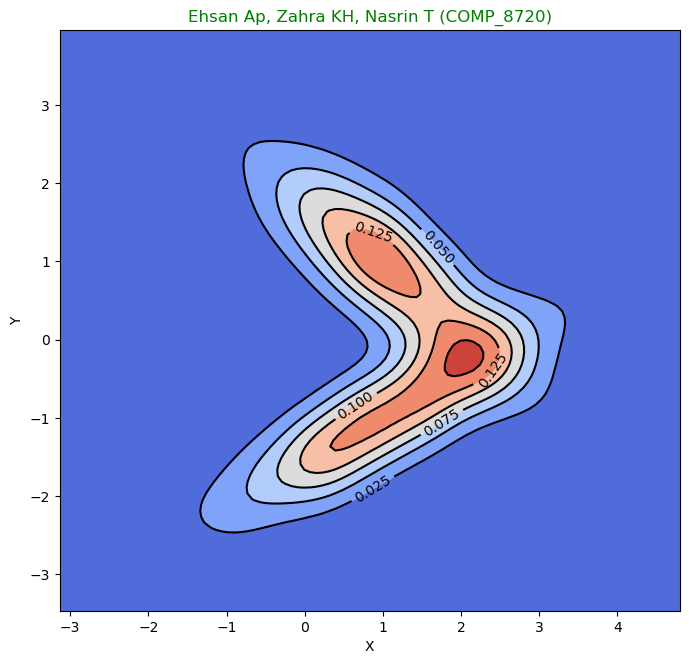

In [110]:
fig = plt.figure(figsize=(8, 8))
ax = fig.gca()
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
cfset = ax.contourf(xx, yy, f, cmap='coolwarm')
ax.imshow(np.rot90(f), cmap='coolwarm', extent=[xmin, xmax, ymin, ymax])
cset = ax.contour(xx, yy, f, colors='k')
ax.clabel(cset, inline=1, fontsize=10)
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.title("Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)", color='green')

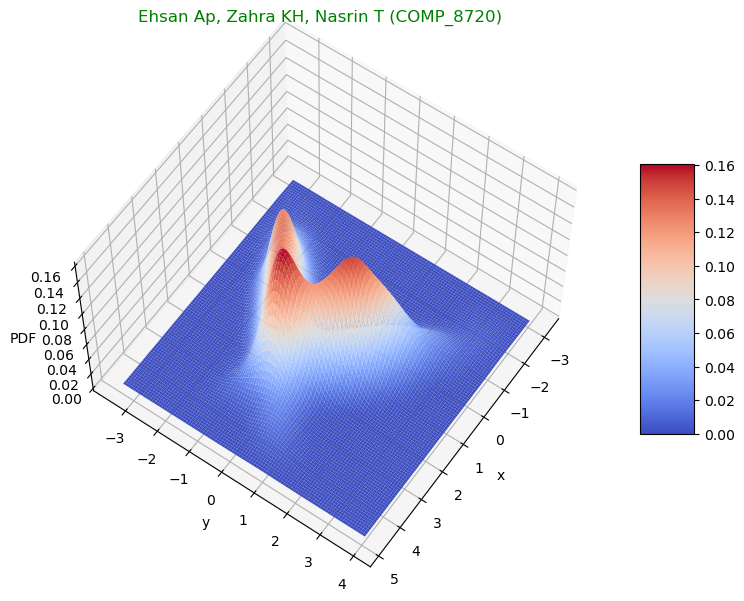

In [111]:
fig = plt.figure(figsize=(13, 7))
ax = plt.axes(projection='3d')
surf = ax.plot_surface(xx, yy, f, rstride=1, cstride=1, cmap='coolwarm', edgecolor='none')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('PDF')
ax.set_title("Ehsan Ap, Zahra KH, Nasrin T (COMP_8720)", color='green')
fig.colorbar(surf, shrink=0.5, aspect=5)  # add color bar indicating the PDF
ax.view_init(60, 35)